<a href="https://colab.research.google.com/github/CiaThing/DAA/blob/main/DAA_Pertemuan6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# first two items
n1, n2 = 0, 1
count = 0
nterms = int (input( 'How many terms? ' ))
# check if the number of terms is valid
if nterms <= 0:
  print ('Please enter the positive integer')
elif nterms == 1:
  print ( 'Fibonacci sequence up to', nterms, ' :')
  print (n1)
else :
  print ('Fibonacci sequence :')
  while count < nterms:
    print (n1)
    nth = n1 + n2
    # update value
    n1 = n2
    n2 = nth
    count = count + 1

How many terms? 20
Fibonacci sequence :
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


In [3]:
# Fibonacci dengan rekursi
def rekursi_fibo (n):
  if n <= 1:
    return n
  else :
    return ( rekursi_fibo (n-1) + rekursi_fibo (n-2))
nterms = 20

# cek apakah nilai nterms valid

if nterms <= 0:
  print ( 'Please enter a positive integer')
else :
  print ( 'Fibonacci sequence :')
  for i in range (nterms):
    print (rekursi_fibo (i))

Fibonacci sequence :
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


In [4]:
# Latihan fibonacci 30 angka, bisa input, rekursif

def latihan_recur_fibo (n):
  if n <= 1:
    return n
  else :
    return ( latihan_recur_fibo (n-1) + latihan_recur_fibo (n-2))

nterms = int (input ('How many terms? '))

# cek apakah nilai nterms valid

if nterms <= 0:
  print ( 'Please enter a positive integer')
else : 
  print ( 'Fibonacci sequence :')
  for i in range (nterms):
    print (latihan_recur_fibo (i))

How many terms? 30
Fibonacci sequence :
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946
17711
28657
46368
75025
121393
196418
317811
514229


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

def visualize_tour (tour, style='bo-'):
  if len(tour) > 10000: plt.figure( fgsize=(15,10))
  start = tour[0:1]
  visualize_segment (tour + start, style)
  visualize_segment (start, 'rD')
def visualize_segment (segment, style='bo-'):
  plt.plot ([X(c) for c in segment], [Y(c) for c in segment], style, clip_on=False)
  plt.axis ('scaled')
  plt.axis ('off')

def X(city): "X axis"; return city.real
def Y(city): "Y axis"; return city.imag

In [6]:
from time import process_time
from collections import Counter
def tsp (algorithm, cities):
  t0 = process_time()
  tour = algorithm(cities)
  t1 = process_time ()
  assert Counter (tour) == Counter (cities)
  visualize_tour (tour)
  print ("{}:{} cities => tour length {:.0f}(in {:.3f} sec)".format (name(algorithm), len(tour), distance_tour(tour), t1-t0))

def name (algorithm): 
  return algorithm.__name__.replace('_tsp','')

In [7]:
def greedy_algorithm (cities, start=None):
  C = start or first (cities)
  tour = [C]
  unvisited = set ( cities - {C})
  while unvisited :
    C = nearest_neighbor (C, unvisited)
    tour.append (C)
    unvisited.remove (C)
  return tour 

def first ( collection):
  return next( iter( collection))
def nearest_neighbor ( A, cities):
  return min (cities, key = lambda C: distance_points (C, A))

In [8]:
import random
from itertools import permutations

alltours = permutations
aCity = complex

def distance_points(first, second):
    return abs(first - second)

def distance_tour(aTour):
    return sum(distance_points(aTour[i - 1], aTour[i]) for i in range(len(aTour)))

def generate_cities(nCities):
    seed = 111 
    width = 500
    height = 300

    random.seed((nCities, seed))
    return frozenset(aCity(random.randint(1, width), random.randint(1, height)) for c in range(nCities))

greedy_algorithm:10 cities => tour length 1348(in 0.000 sec)


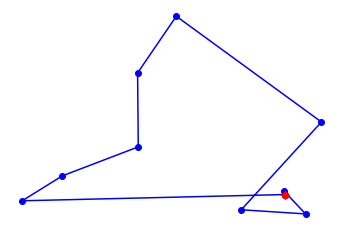

In [9]:
tsp (greedy_algorithm, generate_cities (10))

greedy_algorithm:1991 cities => tour length 15846(in 0.593 sec)


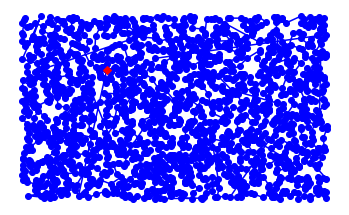

In [16]:
tsp(greedy_algorithm, generate_cities(2000))

In [10]:
string = 'BCAADDDCCACACAC'

# creating tree nodes
class NodeTree (object):
  def __init__(self, left=None, right = None):
    self.left = left
    self.right = right
  
  def children (self):
    return (self.left, self.right)
  
  def nodes (self):
    return ( self.left, self.right)
  
  def __str__(self):
    return '%s_%s' % (self.left, self.right)

In [12]:
# Main function implementing huffman coding 

def huffman_code_tree (node, left = True, binstring = ''):
  if type (node) is str:
    return {node : binstring}
  (l, r) = node.children()
  d = dict()
  d.update (huffman_code_tree (l, True, binstring + '0'))
  d.update (huffman_code_tree (r, False, binstring +'1'))
  return d

In [19]:
# calculating frequency
freq = {}
for c in string:
  if c in freq:
    freq [c] = freq [c] + 1
  else :
    freq [c] = 1

freq = sorted (freq.items(), key = lambda x: x[1], reverse = True)
nodes = freq
while len(nodes) > 1:
  (key1, c1) = nodes [-1]
  (key2, c2) = nodes [-2]
  nodes = nodes [ : -2]
  node = NodeTree (key1, key2)
  nodes.append ((node, c1 + c2))

  nodes = sorted (nodes, key = lambda x: x[1], reverse = True)

huffmanCode = huffman_code_tree(nodes [0][0])

print ('Char | Huffman code ')
print ('-----------------------')
for (char, frequency) in freq:
  print (' %-4r |%12s ' % (char, huffmanCode [char]))

Char | Huffman code 
-----------------------
 'C'  |           0 
 'A'  |          11 
 'D'  |         101 
 'B'  |         100 


In [20]:
string = 'HUFFMAN'

print(' char | Huffman code ')
print('========================')
for (char, frequency) in freq:
  print(' %-4r |%12s' % (char, huffmanCode[char]))

 char | Huffman code 
 'C'  |           0
 'A'  |          11
 'D'  |         101
 'B'  |         100
